In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [0]:
def softmax(Z):
  m = np.max(Z, axis=1, keepdims=True)
  exp = np.exp(Z - m)
  sum_exp = np.sum(exp, axis=1, keepdims=True)
  A = exp / sum_exp
  return A


def initialize_parameters(n_input, n_output):
  np.random.seed(20181005)
  W = np.random.rand(n_input, n_output)
  b = np.zeros((1,n_output))
  return W, b


def forward_propagation(X, W, b):
  Z = np.dot(X, W) + b
  A = softmax(Z)
  return A


def compute_cost(A, Y):
  cost = -np.sum(Y * np.log(A) + (1-Y) * np.log(1 - A)) / len(Y)
  return cost

def compute_acc(A, Y):
  Y_hat = np.argmax(A, axis=1)
  Y = np.argmax(Y, axis=1)
  acc = np.sum(Y_hat == Y) / len(A) * 100
  return acc
  
def backward_propagation(X, Y, A):
  dL_dZ = A - Y
  dZ_dW = X
  dZ_db = 1
  
  dL_dW = np.dot(dZ_dW.T, dL_dZ)
  dL_db = np.sum(dL_dZ, axis=0, keepdims=True) / len(Y)
  
  return dL_dW, dL_db

def update_parameters(W, b, dW, db, learning_rate):
  W -= learning_rate * dW
  b -= learning_rate * db
  return W, b

  

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
n_class = 10

X_train = np.reshape(X_train, (-1, 28 * 28)) / 255.
X_test = np.reshape(X_test, (-1, 28 * 28)) /255.

Y_train = np.eye(n_class)[Y_train]
Y_test = np.eye(n_class)[Y_test]

print("X_train.shape :", X_train.shape)
print("Y_train.shape :", Y_train.shape)
print()
print("X_test.shape :", X_test.shape)
print("Y_test.shape :", Y_test.shape)

X_train.shape : (60000, 784)
Y_train.shape : (60000, 10)

X_test.shape : (10000, 784)
Y_test.shape : (10000, 10)


In [4]:
epochs = 200
learning_rate = 1e-5

n_input = X_train.shape[1]
n_output = Y_train.shape[1]

W, b = initialize_parameters(n_input, n_output)
print("W.shape :", W.shape)
print("b.shape :", b.shape)

for epoch in range(epochs):
  A = forward_propagation(X_train, W, b)
  cost = compute_cost(A, Y_train)
  acc = compute_acc(A, Y_train)
  
  dW, db = backward_propagation(X_train, Y_train, A)

  W, b = update_parameters(W, b, dW, db, learning_rate)

  if epoch % 10 == 0 :
    print(epoch,"\t", cost,"\t", acc)
  

W.shape : (784, 10)
b.shape : (1, 10)
0 	 6.622716557598398 	 10.871666666666666
10 	 1.6763429877201672 	 65.69166666666668
20 	 1.2275996730572765 	 76.18666666666667
30 	 1.048664451776368 	 80.08
40 	 0.9493325988731668 	 82.18666666666667
50 	 0.8848018416659772 	 83.49833333333333
60 	 0.8387933474037014 	 84.45166666666667
70 	 0.8039174635683063 	 85.2
80 	 0.7763138972726036 	 85.79333333333334
90 	 0.7537582584789764 	 86.315
100 	 0.7348719334845234 	 86.72666666666666
110 	 0.7187509792319663 	 87.06166666666667
120 	 0.7047755089606526 	 87.41
130 	 0.6925046280943482 	 87.68
140 	 0.6816151157446425 	 87.88833333333334
150 	 0.6718639033939282 	 88.12166666666667
160 	 0.6630641832806232 	 88.28666666666666
170 	 0.655069670593189 	 88.45666666666666
180 	 0.6477639289742927 	 88.62
190 	 0.6410529434325872 	 88.79166666666667


In [5]:
A_test = forward_propagation(X_test, W, b)
acc_test = compute_acc(A_test, Y_test)
print("Train Acc :", acc)

print("Test Acc  :", acc_test)


Train Acc : 88.925
Test Acc  : 89.62


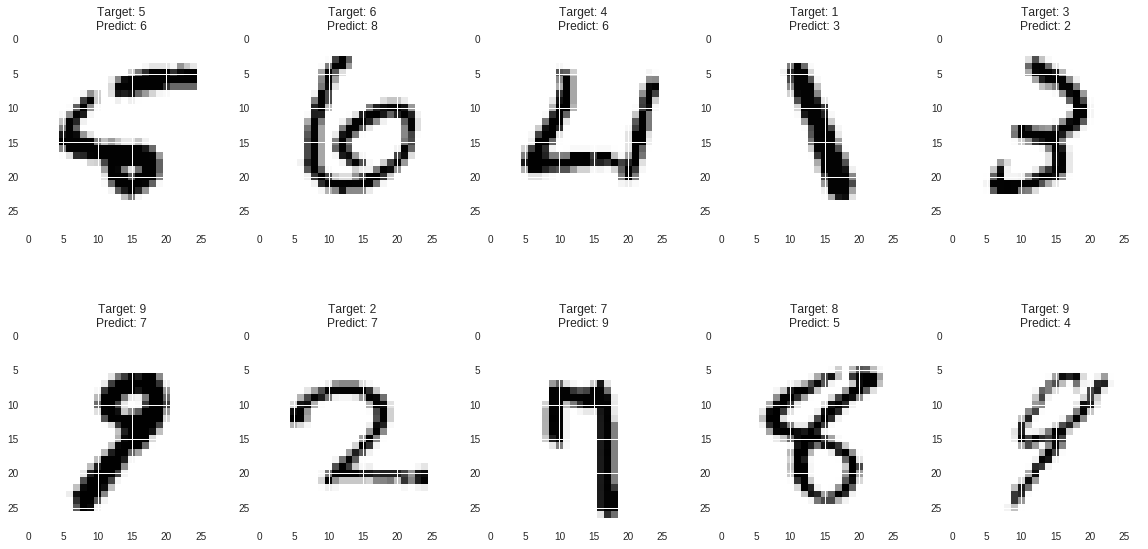

In [6]:
%matplotlib inline
Y_hat = np.argmax(A_test, axis=1)
Y = np.argmax(Y_test, axis=1)
fig=plt.figure(figsize=(20, 10))
for i in range(0, 10):
  img = X_test[Y_hat != Y][i].reshape(28, 28)
  fig.add_subplot(2, 5, i+1)
  plt.imshow(img)
  plt.title("Target: "+str(Y[Y_hat != Y][i])+"\nPredict: "+ str(Y_hat[Y_hat != Y][i]) )
